In [47]:
import numpy as np
import torch
import torch.optim as optim

# import helper
import matplotlib.pyplot as plt

from torchvision import datasets, transforms

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5))])  # 标准化数据 灰度数据 只需要转换一个层 的数字到 -1, 1 之间（方便计算）

In [3]:
x_train = datasets.MNIST('data/', download=True, transform=transform)  # 下载数据 执行张量转换

In [4]:
x_train_loader = torch.utils.data.DataLoader(x_train, batch_size=64, shuffle=True)

In [5]:
x_train_loader

In [6]:
dataiter = iter(x_train_loader)

In [9]:
images, lable = dataiter.next()

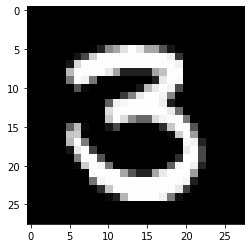

In [14]:
plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r')

In [27]:
from torch import nn
import torch.nn.functional as F


class NetWork(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x

In [28]:
model = NetWork()
model

NetWork(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [31]:
images, lable = dataiter.next()
images.resize_(64, 1, 784)

ps = model.forward(images[0])

In [32]:
ps

tensor([[0.1044, 0.1211, 0.0812, 0.0944, 0.0928, 0.1160, 0.1020, 0.1004, 0.0880,
         0.0998]], grad_fn=<SoftmaxBackward>)

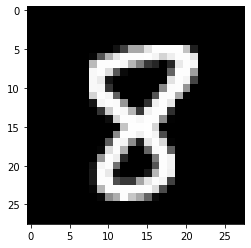

In [36]:
plt.imshow(images[0].view(1, 28, 28).squeeze(), cmap='Greys_r')

In [37]:
!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py

/bin/sh: wget: command not found


In [38]:
import helper

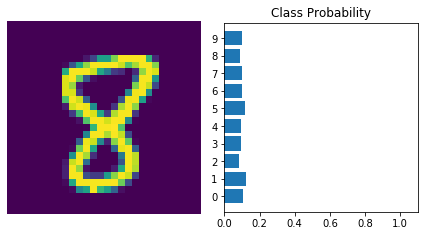

In [39]:
helper.view_classify(images[0].view(1, 28, 28), ps)

In [40]:
from collections import OrderedDict

input_size = 784
hidden_size = [128, 64]
output_size = 10

model = nn.Sequential(OrderedDict([
    ('f1', nn.Linear(784, 128)),
    ('relu1', nn.ReLU()),
    ('f2', nn.Linear(128, 64)),
    ('relu2', nn.ReLU()),
    ('output', nn.Linear(64, 10)),
    ('softmax', nn.Softmax()),
]))

In [41]:
model

Sequential(
  (f1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (f2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=None)
)

In [42]:
model = nn.Sequential(OrderedDict([
    ('f1', nn.Linear(784, 400)),
    ('relu1', nn.ReLU()),
    ('f2', nn.Linear(400, 200)),
    ('relu2', nn.ReLU()),
    ('f3', nn.Linear(200, 100)),
    ('relu3', nn.ReLU()),
    ('output', nn.Linear(100, 10)),
    ('softmax', nn.Softmax()),
]))

In [43]:
model

Sequential(
  (f1): Linear(in_features=784, out_features=400, bias=True)
  (relu1): ReLU()
  (f2): Linear(in_features=400, out_features=200, bias=True)
  (relu2): ReLU()
  (f3): Linear(in_features=200, out_features=100, bias=True)
  (relu3): ReLU()
  (output): Linear(in_features=100, out_features=10, bias=True)
  (softmax): Softmax(dim=None)
)

In [48]:
criterion = nn.CrossEntropyLoss() # 交叉熵损失函数
optimizer = optim.SGD(model.parameters(), lr=0.01) # 随机梯度下降，学习率0.01

In [50]:
print('before: ', model.f1.weight)

before:  Parameter containing:
tensor([[-0.0315, -0.0263,  0.0284,  ...,  0.0325,  0.0024, -0.0082],
        [ 0.0270, -0.0088,  0.0283,  ...,  0.0228, -0.0169, -0.0273],
        [ 0.0081,  0.0235,  0.0163,  ...,  0.0177, -0.0301, -0.0329],
        ...,
        [-0.0049,  0.0061,  0.0173,  ..., -0.0218,  0.0353,  0.0163],
        [-0.0281, -0.0141,  0.0243,  ...,  0.0020, -0.0107, -0.0224],
        [-0.0299,  0.0237, -0.0320,  ..., -0.0121, -0.0203, -0.0214]],
       requires_grad=True)


In [66]:
images, labels = next(iter(x_train_loader))
images.resize_(64, 784)

optimizer.zero_grad()  # 归0梯度

output = model.forward(images) # 反向传播
loss = criterion(output, labels) # 计算损失loss
loss.backward() # 更新所有权重

print('gradient -', model.f1.weight.grad)
optimizer.step()
print('update weight: ', model.f1.weight)

gradient - tensor([[-6.9122e-05, -6.9122e-05, -6.9122e-05,  ..., -6.9121e-05,
         -6.9121e-05, -6.9121e-05],
        [ 4.6769e-06,  4.6769e-06,  4.6769e-06,  ...,  4.6769e-06,
          4.6769e-06,  4.6769e-06],
        [-8.5360e-06, -8.5360e-06, -8.5360e-06,  ..., -8.5359e-06,
         -8.5359e-06, -8.5359e-06],
        ...,
        [-4.8625e-05, -4.8625e-05, -4.8625e-05,  ..., -4.8625e-05,
         -4.8625e-05, -4.8625e-05],
        [ 5.1869e-05,  5.1869e-05,  5.1869e-05,  ...,  5.1869e-05,
          5.1869e-05,  5.1869e-05],
        [-1.6315e-05, -1.6315e-05, -1.6315e-05,  ..., -1.6315e-05,
         -1.6315e-05, -1.6315e-05]])
update weight:  Parameter containing:
tensor([[-0.0315, -0.0263,  0.0284,  ...,  0.0325,  0.0024, -0.0082],
        [ 0.0270, -0.0088,  0.0283,  ...,  0.0228, -0.0169, -0.0273],
        [ 0.0081,  0.0235,  0.0163,  ...,  0.0177, -0.0301, -0.0329],
        ...,
        [-0.0049,  0.0061,  0.0173,  ..., -0.0218,  0.0353,  0.0163],
        [-0.0281, -0.0141,

In [83]:
epochs = 3
print_every = 40
steps = 0
for e in range(epochs):
    running_loss = 0
    for images, labels in x_train_loader:
        steps += 1
        
        images.resize_(images.shape[0], 784)
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss = loss.item()
        
        if steps % print_every == 0:
            print('epoch: {}/{}'.format(e+1, epochs), 'loss: {:.4f}'.format(running_loss / print_every))

epoch: 1/3 loss: 0.0431
epoch: 1/3 loss: 0.0459
epoch: 1/3 loss: 0.0459
epoch: 1/3 loss: 0.0448
epoch: 1/3 loss: 0.0519
epoch: 1/3 loss: 0.0502
epoch: 1/3 loss: 0.0545
epoch: 1/3 loss: 0.0514
epoch: 1/3 loss: 0.0568
epoch: 1/3 loss: 0.0561
epoch: 1/3 loss: 0.0580
epoch: 1/3 loss: 0.0568
epoch: 1/3 loss: 0.0565
epoch: 1/3 loss: 0.0580
epoch: 1/3 loss: 0.0592
epoch: 1/3 loss: 0.0565
epoch: 1/3 loss: 0.0588
epoch: 1/3 loss: 0.0596
epoch: 1/3 loss: 0.0596
epoch: 1/3 loss: 0.0572
epoch: 1/3 loss: 0.0596
epoch: 1/3 loss: 0.0588
epoch: 1/3 loss: 0.0588
epoch: 2/3 loss: 0.0596
epoch: 2/3 loss: 0.0600
epoch: 2/3 loss: 0.0596
epoch: 2/3 loss: 0.0600
epoch: 2/3 loss: 0.0600
epoch: 2/3 loss: 0.0576
epoch: 2/3 loss: 0.0592
epoch: 2/3 loss: 0.0604
epoch: 2/3 loss: 0.0596
epoch: 2/3 loss: 0.0584
epoch: 2/3 loss: 0.0592
epoch: 2/3 loss: 0.0580
epoch: 2/3 loss: 0.0588
epoch: 2/3 loss: 0.0584
epoch: 2/3 loss: 0.0596
epoch: 2/3 loss: 0.0584
epoch: 2/3 loss: 0.0596
epoch: 2/3 loss: 0.0588
epoch: 2/3 loss:

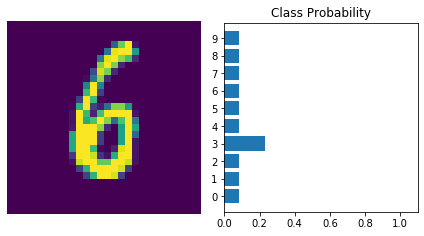

In [89]:
images, labels = next(iter(x_train_loader))

img = images[2].view(1, 784)
with torch.no_grad():
    logits = model.forward(img)
    
ps = F.softmax(logits, dim=1)

helper.view_classify(img.view(1, 28, 28), ps)